In [1]:
# Here we take care of paths.

from pathlib import Path
import os
print('Starting path:' + os.getcwd())
if os.getcwd()[-16:] == 'image-to-tex-OCR':
    pass
else:
    PATH = Path().resolve().parents[0]
    os.chdir(PATH)

# make sure you are in Paragraph_to_Tex folder
print('Current path:' + os.getcwd())

Starting path:/Users/gregory/PROJECT_ML/PROJECT_AMINE/image-to-tex-OCR/Jupyter_Notebooks
Current path:/Users/gregory/PROJECT_ML/PROJECT_AMINE/image-to-tex-OCR


In [2]:
# Import the Printed_Tex_Data_Module

from Data.Data_Module import Data_Module
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms
from IPython.display import display, Math

In [3]:
'''
path_to_formulas = 'Data/Data_Bank/,
                  path_to_image_names= 'Data/Data_Bank/generated_png_images',


'''


data = Data_Module(stage = 'fit',
                 set_max_label_length = 256,
                 number_png_images_to_use_in_dataset=350*1000,
                 labels_transform='default',
                image_transform_name ='alb',
                 train_val_fraction = 0.99,
                
                load_vocabulary = False,
                 


                 batch_size = 64,
                num_workers = 10,
                data_on_gpu = False,
                )



# Generates the dataframe from the images and formulas
# images need to be in the folder Data/Data_Bank/generated_png_images
# formulas need to be in Data/Data_Bank/final_png_formulas.txt
# image filenames need to be in Data/Data_Bank/corresponding_png_images.txt
data.prepare_data()

# if one wants to load a vocabulary do not use data.prepare_dataframe(), 
# but instead set load_vocabulary = True


In [4]:
data.df

,formula,image_name,height,width,formula_length,latex_tokenized,tokenized_len
0,R _ { 1 2 } K _ { 1 } R _ { 2 1 } d K _ { 2 } ...,80f1db54ec657ab.png,20,200,105,"[R, _, {, 1, 2, }, K, _, {, 1, }, R, _, {, 2, ...",53
1,E _ { n } - E _ { m } = \frac { \lambda ^ { \p...,4c0c01a5fb03248.png,39,169,106,"[E, _, {, n, }, -, E, _, {, m, }, =, \frac, {,...",46
2,\sigma ^ { 1 } + i \sigma ^ { 2 } = f ( \sigma...,3f55826fd850d77.png,19,138,75,"[\sigma, ^, {, 1, }, +, i, \sigma, ^, {, 2, },...",28
3,B | _ { \partial \Sigma _ { 3 } } \rightarrow ...,a6a043f87f6ffdc.png,20,142,123,"[B, |, _, {, \partial, \Sigma, _, {, 3, }, }, ...",36
4,\phi _ { i } ^ { \prime } ( x ) = \phi _ { i }...,4d0e536147c711b.png,18,175,118,"[\phi, _, {, i, }, ^, {, \prime, }, (, x, ), =...",43
...,...,...,...,...,...,...,...
317872,D _ { \mu } f = \partial _ { \mu } f - { \frac...,36863.png,100,600,252,"[D, _, {, \mu, }, f, =, \partial, _, {, \mu, }...",102
317873,"F ( \bar { y } , z ) = \sum _ { s } \oint \fra...",89587.png,100,600,302,"[F, (, \bar, {, y, }, ,, z, ), =, \sum, _, {, ...",120
317874,X _ { d } = \mathrm { d i a g } \left( x _ { 1...,47969.png,100,500,187,"[X, _, {, d, }, =, \mathrm, {, d, i, a, g, }, ...",71
317875,\operatorname* { l i m } _ { \tau \rightarrow ...,76373.png,40,200,99,"[\operatorname*, {, l, i, m, }, _, {, \tau, \r...",31


In [5]:
print('height:',max(data.df['height']), 'width:' , max(data.df['width']))

height: 800 width: 4143


KeyError: "None of [Int64Index([ 20,  39,  19,  20,  18,  31,  43,  35,  45,  15,\n            ...\n             50,  40,  60,  40, 100, 100, 100, 100,  40, 100],\n           dtype='int64', length=315998)] are in the [columns]"

<AxesSubplot:>

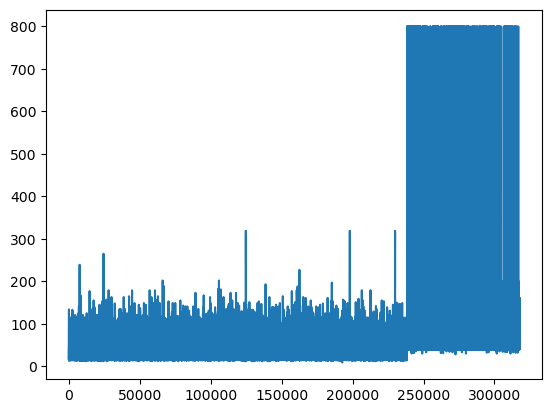

In [7]:
data.df['height'].plot()

<AxesSubplot:>

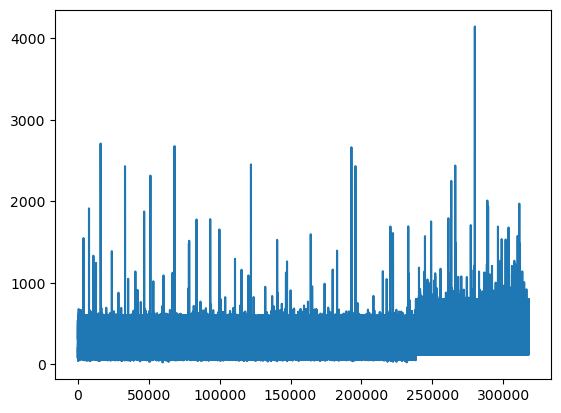

In [8]:
data.df['width'].plot()

/var/folders/wc/60y8v25x3ns_jgsx6clbdb180000gn/T/ipykernel_77002/600913885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.df.drop(238496, inplace=True)


In [11]:
print( 
    'Vocabulary size:',len(data.vocabulary),
    '\nMax label length:', data.max_label_length,
    "\nStart <S> goes to index ",data.vocabulary['<S>'],
      "\nEnd <E> goes to index ",data.vocabulary['<E>'],
      "\nPadding <P> goes to index ",data.vocabulary['<P>'],
)

Vocabulary size: 630 
Max label length: 258 
Start <S> goes to index  0 
End <E> goes to index  1 
Padding <P> goes to index  2


In [12]:
# prepeares the dataloaders with transformations and splits train/val
data.setup()

Train/Val Data is ready for Model loading.


In [13]:
data.inverse_vocabulary

{0: '<S>',
 1: '<E>',
 2: '<P>',
 3: '',
 4: '!',
 5: '"',
 6: '&',
 7: "'",
 8: '(',
 9: ')',
 10: '*',
 11: '+',
 12: ',',
 13: '-',
 14: '--',
 15: '---',
 16: '.',
 17: '/',
 18: '0',
 19: '0.14',
 20: '0.4',
 21: '0.5',
 22: '0.7',
 23: '1',
 24: '1.5',
 25: '10',
 26: '2',
 27: '3',
 28: '4',
 29: '5',
 30: '6',
 31: '7',
 32: '8',
 33: '8.5',
 34: '9',
 35: ':',
 36: ';',
 37: '<',
 38: '=',
 39: '>',
 40: '?',
 41: '@',
 42: 'A',
 43: 'B',
 44: 'C',
 45: 'D',
 46: 'E',
 47: 'F',
 48: 'G',
 49: 'H',
 50: 'I',
 51: 'J',
 52: 'K',
 53: 'L',
 54: 'M',
 55: 'N',
 56: 'O',
 57: 'Object]',
 58: 'P',
 59: 'Q',
 60: 'R',
 61: 'S',
 62: 'T',
 63: 'U',
 64: 'V',
 65: 'W',
 66: 'X',
 67: 'Y',
 68: 'Z',
 69: '[',
 70: '[object',
 71: '\\',
 72: '\\!',
 73: '\\"',
 74: '\\#',
 75: '\\&',
 76: "\\'",
 77: '\\,',
 78: '\\:',
 79: '\\;',
 80: '\\Big',
 81: '\\Bigg',
 82: '\\Biggl',
 83: '\\Biggm',
 84: '\\Biggr',
 85: '\\Bigl',
 86: '\\Bigm',
 87: '\\Bigr',
 88: '\\Box',
 89: '\\Delta',
 90: '\

# Checking the data 


In [14]:
data.df['image_name'][238515]

'78023.png'

Image is below


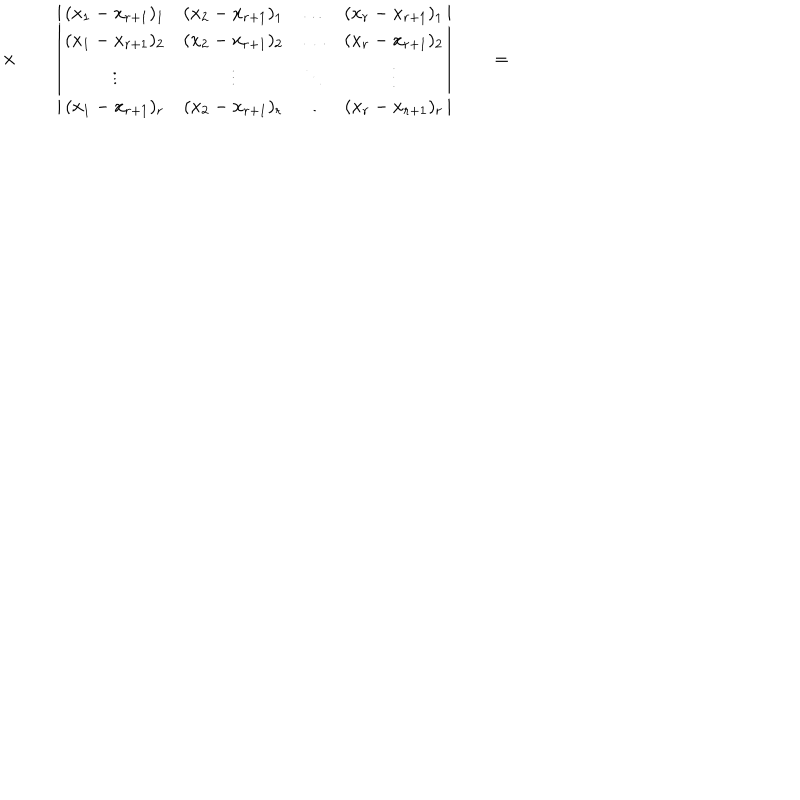

Label:


<IPython.core.display.Math object>

Tex formula: 

\times \qquad \left\vert \begin{array} { c c c c } { ( x _ { 1 } - x _ { r + 1 } ) _ { 1 } } & { ( x _ { 2 } - x _ { r + 1 } ) _ { 1 } } & { \ldots } & { ( x _ { r } - x _ { r + 1 } ) _ { 1 } } \\ { ( x _ { 1 } - x _ { r + 1 } ) _ { 2 } } & { ( x _ { 2 } - x _ { r + 1 } ) _ { 2 } } & { \ldots } & { ( x _ { r } - x _ { r + 1 } ) _ { 2 } } \\ { \vdots } & { \vdots } & { \ddots } & { \vdots } \\ { ( x _ { 1 } - x _ { r + 1 } ) _ { r } } & { ( x _ { 2 } - x _ { r + 1 } ) _ { r } } & { \ldots } & { ( x _ { r } - x _ { r + 1 } ) _ { r } } \\ \end{array} \right\vert \qquad = \qquad


In [15]:
# How to access generated png images 
IMAGE_NAME = data.df['image_name'][238515]
image_path= "Data/Data_Bank/generated_png_images/" + IMAGE_NAME
image = Image.open(image_path)#.convert("L")
print('Image is below')
display(image)

# Related Label

image_label_list = data.df[data.df['image_name'] ==  IMAGE_NAME]['formula'].tolist()#.item()
image_label = " ".join(image_label_list)
print('Label:')
display(Math(image_label))
print('Tex formula: \n')
print(data.df[data.df['image_name'] == IMAGE_NAME]['formula'].item())

### Check  vocabulary 

In [ ]:
print(data.vocabulary)

In [ ]:
# Can acrtually see the frequncies

data.data_server.vocabulary_dataframe.sort_values("freq", ascending=False)

In [ ]:
# Plot of vocabulary
import matplotlib.pyplot as plt

# first order the columns by decsending frequncy 
data.data_server.vocabulary_dataframe = data.data_server.vocabulary_dataframe.sort_values("freq", ascending=False)

# next we plot them
data.data_server.vocabulary_dataframe.plot(x="token", y='freq', kind='barh', figsize =(16,75))
plt.show()

#### Look at the distribution of data

In [ ]:
# We plot the tokenized len distribution

tokenized_len = data.df['tokenized_len'].value_counts()
tokenized_len

In [ ]:
# How long are formulas
plt.figure(figsize=(40,5))
sns.countplot(x=data.df['tokenized_len']);

## Accessing the data

In [16]:
# Helper Function to convert prediction labels to strings
def token_to_strings(tokens):
    mapping = data.vocabulary
    inverse_mapping =data.inverse_vocabulary
    s=''
    if tokens.shape[0] ==1:
        tokens = tokens[0]
    for number in tokens:
        letter = inverse_mapping[number.item()]
        s= s + str(letter)
    return s


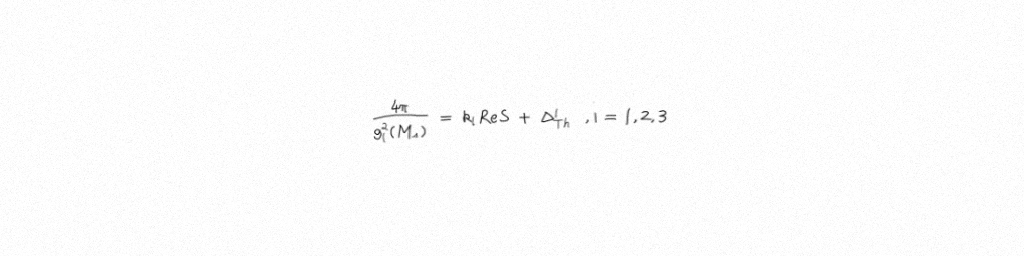

<S>{\frac{4\pi}{g_{i}^{2}(M_{s})}}\=\k_{i}ReS\+\\Delta_{Th}^{i}\\\,i=1,2,3<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>


In [41]:
transform = transforms.ToPILImage()
display(transform(data.data_train[2][0]))
print(token_to_strings(data.data_train[2][1]))

In [ ]:
# use 
# class albumentations.augmentations.crops.transforms.CropAndPad
# class albumentations.augmentations.geometric.transforms.PadIfNeeded

Image is below


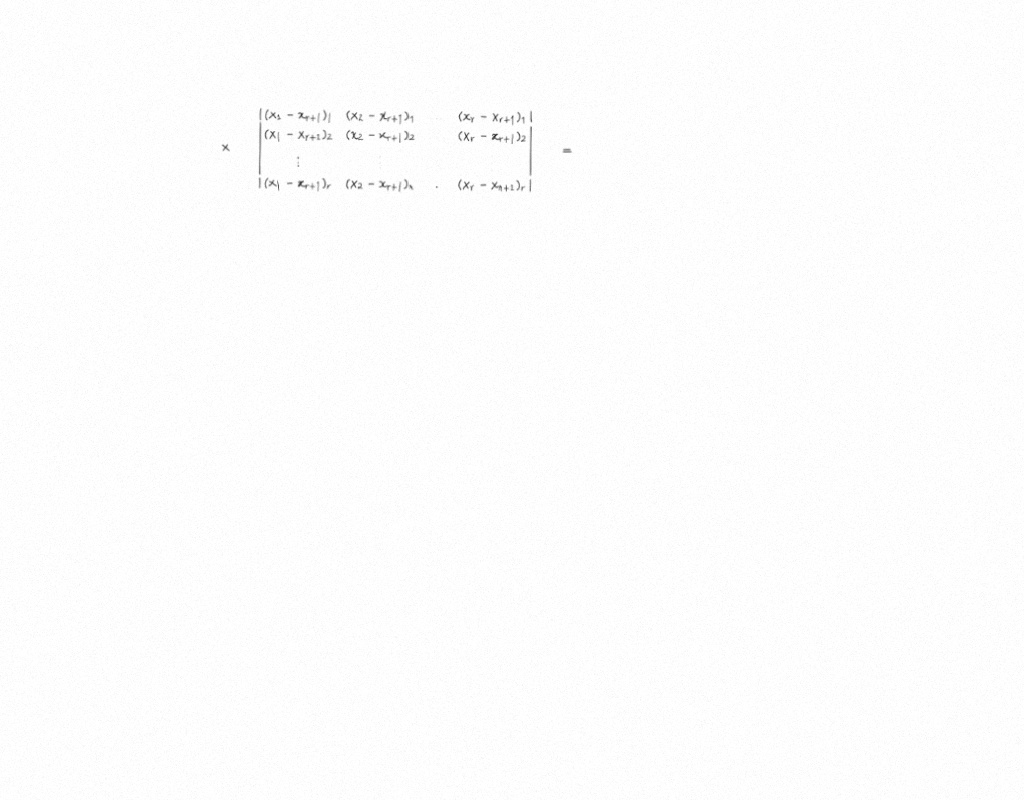

In [18]:
import numpy as np
IMAGE_NAME = data.df['image_name'][238515]
image_path= "Data/Data_Bank/generated_png_images/" + IMAGE_NAME
image = Image.open(image_path).convert("L")
print('Image is below')

im = data.image_transform_alb(image=np.array(image))['image']
display(transform(im))

In [ ]:
import numpy as np
IMAGE_NAME = data.df['image_name'][38515]
image_path= "Data/Data_Bank/generated_png_images/" + IMAGE_NAME
image = Image.open(image_path)#.convert("L")
print('Image is below')

im = data.image_transform_alb(image=np.array(image))['image']
display(transform(im))